In [49]:
import matplotlib.pyplot as plt
import pywt
import pandas as pd
import numpy as np
import math
import random

In [50]:
# sin noise
def noisy_sin(steps_per_cycle = 50, #파장
              number_of_cycles = 500,
              random_factor = 0.4):
    
    random.seed(0)
    
    df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
    df["sin_t"] = df.t.apply(lambda x: math.sin(x* (2*math.pi / steps_per_cycle) + random.uniform(-1.0, +1.0) * random_factor))
    df["sin_t_clean"] = df.t.apply(lambda x: math.sin(x *(2*math.pi / steps_per_cycle)))
    print("create period-{} sin wave with {} cycles".format(steps_per_cycle, number_of_cycles))
    print("In total, the sin wave time series length is {}".format(steps_per_cycle * number_of_cycles + 1))
    
    return(df)

create period-10 sin wave with 500 cycles
In total, the sin wave time series length is 5001


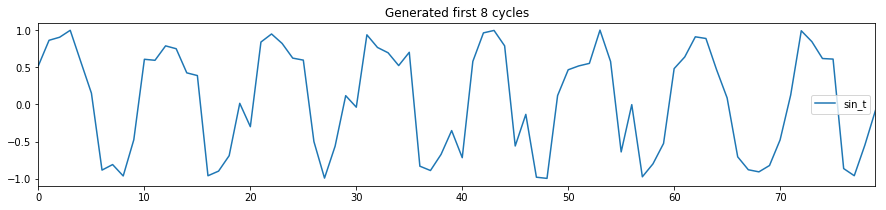

In [51]:
steps_per_cycle = 10 # 주기

df = noisy_sin(steps_per_cycle = steps_per_cycle, random_factor = 0.8)

n_plot = 8
df[["sin_t"]].head(steps_per_cycle*n_plot).plot(
    title = "Generated first {} cycles".format(n_plot),
    figsize = (15,3))

In [52]:
df.head()

,t,sin_t,sin_t_clean
0,0,0.523603,0.000000
1,1,0.862933,0.587785
2,2,0.904221,0.951057
3,3,0.997440,0.951057
4,4,0.573096,0.587785


In [53]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [54]:
from statsmodels.robust import mad

def waveletSmooth(x, wavelet = "haar", level = 1, title = None, sample = 80):
    
    #calculate the wavelet coefficients
    coeff = pywt.wavedec(x, wavelet, mode = "per")
    
    #calculate a threshold
    sigma = mad(coeff[-level])
    
    uthresh = sigma * np.sqrt( 2*np.log(len(x)))
    coeff[1:] = (pywt.threshold( i, value=uthresh, mode="soft") for i in coeff[1:])

    y = pywt.waverec(coeff, wavelet, mode="per" )
    f, ax = plt.subplots(figsize=(15,3))
    plt.plot(x[:sample], color="b", alpha=0.5)
    plt.plot(y[:sample], color="b")
    if title:
        ax.set_title(title)
    ax.set_xlim((0,len(y[:sample])))
    return y

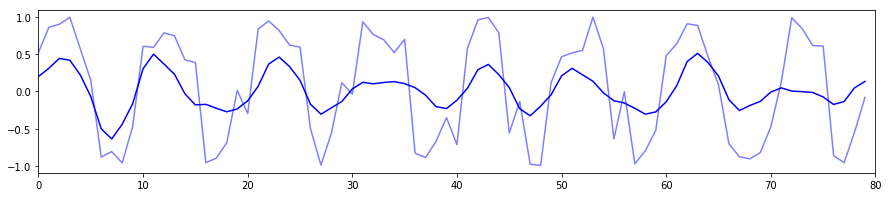

In [55]:
denoised_sin_t = waveletSmooth(df.sin_t, wavelet="db4", level=1)